In [1]:
#--------Import packages
#--------For Netcdf manipulation
import statsmodels.tsa.stattools
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_abs.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')
sam_df = sam_df.drop(["Years", "Months"], axis=1)

# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [4]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["SIV"] = vol_df["SIV"]

In [5]:
df_new

,Dates,SAM,SIV
0,2007-05-01,-1.02,1123.249095
1,2008-05-01,-0.66,739.475298
2,2009-05-01,-0.14,968.900120
3,2010-05-01,1.51,973.981453
4,2011-05-01,1.37,854.359283
...,...,...,...
92,2014-10-01,1.32,1017.586997
93,2015-10-01,-0.66,1271.630218
94,2016-10-01,-0.89,1336.782919
95,2017-10-01,-0.64,1258.799548


In [8]:
df_new.corr(min_periods=6)

,SAM,SIV
SAM,1.000000,-0.130299
SIV,-0.130299,1.000000


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *
dir = '/Users/fridaperez/Developer/repos/local_repo/pub_plots/'

def month_ccf_sam(df):
    x = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
    df_selmons = []
    df_vol_selmons = []
    df_sam_selmons = []
    cdfs = []
    df_list = []
    ind0 = 0
    for i in x:
        df_selmon = df[df['Dates'].dt.year.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SAM, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        #print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        #print(df_vol_selmons)
        # SAM #
        df_sam_selmon = df_selmon[['Dates', 'SAM']]
        df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
        df_sam_selmon = df_sam_selmon.set_index(['Dates'])
        df_sam_selmons.append(df_sam_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row =0 if i <= 2 else 1
            col = i if i <=2 else i-3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_sam_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_sam_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SAM (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0],3), x = .95, y = 0.05, transform = axes[row, col].transAxes, ha = 'right') #ha, horizontal line
            lag += 1
        fig.tight_layout()
        #plt.savefig(dir + str(x))


/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_6314/460619100.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_6314/460619100.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227

KeyError: 5

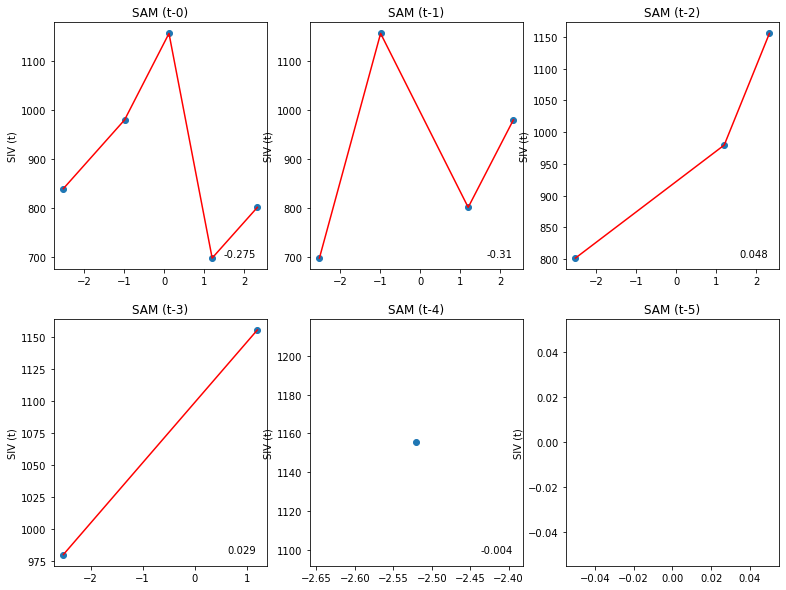

In [7]:
month_ccf_sam(df_new)

## SOI

In [ ]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [ ]:

# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [ ]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [ ]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [ ]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns={'SOI': 'value'}, inplace=True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["SIV"] = vol_df["SIV"]


In [ ]:
df_new_soi.reset_index()

In [ ]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [ ]:
df_new_soi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_soi(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_soi_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SOI, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_soi_selmon = df_selmon[['Dates', 'SOI']]
        df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
        df_soi_selmon = df_soi_selmon.set_index(['Dates'])
        df_soi_selmons.append(df_soi_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_soi_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_soi_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SOI (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))



In [ ]:
month_ccf_soi(df_new_soi)

## ASL

In [ ]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [ ]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
#print(asl_df)

In [ ]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

In [ ]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

In [ ]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["SIV"] = vol_df["SIV"]
print(df_new_asl)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_asl(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_asl_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.ActCenPres, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_asl_selmon = df_selmon[['Dates', 'ActCenPres']]
        df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
        df_asl_selmon = df_asl_selmon.set_index(['Dates'])
        df_asl_selmons.append(df_asl_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_asl_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_asl_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"ASL (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


In [ ]:
month_ccf_asl(df_new_asl)